<a href="https://colab.research.google.com/github/Kavya2906/House_Price_Prediction/blob/main/Dragon_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dragon Real Estate-Price Predictor


In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("/content/hou_all.csv")

In [ ]:
df.head ()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#Plotting Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbeecc1d490>,
      dtype=object)

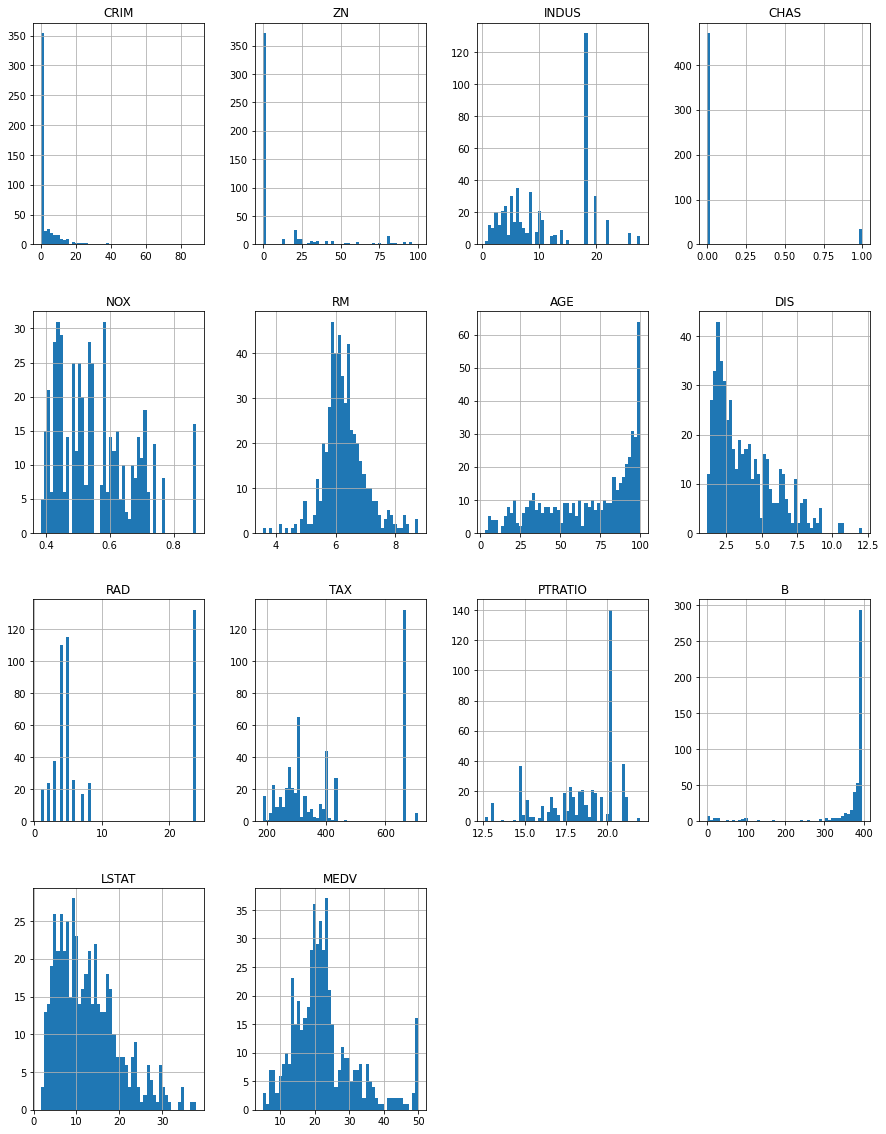

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(15,20))

#Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}")

Rows in train set: 404
 Rows in test set: 102


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
regressor=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in regressor.split(housing,housing["CHAS"]):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [6]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [5]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

# Looking for Correlations

In [7]:
corr_matrix= housing.corr()

In [8]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

#Pipelining

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([("std_scaler",StandardScaler())])
housing_num_tr=my_pipeline.fit_transform(housing) 

In [41]:
housing_num_tr

array([[-0.35082247, -0.49148409, -1.25183452, ..., -1.08091535,
         0.2995192 , -0.51357301],
       [ 1.37303938, -0.49148409,  1.15752471, ...,  0.78926008,
         0.35531976,  1.43854081],
       [-0.2938439 , -0.49148409, -0.61122142, ..., -0.42852857,
         0.40196786, -0.66968264],
       ...,
       [-0.34805722,  0.27583291, -0.69445654, ..., -0.68948328,
         0.40196786, -1.0146106 ],
       [-0.34631323, -0.49148409,  2.27971238, ...,  0.31084311,
         0.11809354,  0.32198523],
       [-0.3425412 , -0.49148409,  0.53177502, ..., -0.86345309,
         0.40196786,  0.86465206]])

In [17]:
housing= strat_test_set.drop('MEDV',axis=1)
housing_labels=strat_test_set['MEDV'].copy()

# Selecting Desired Model

In [42]:
from sklearn.ensemble import RandomForestRegressor
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

# Evaluating Model

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_pred=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_pred)
rmse=np.sqrt(mse)

In [44]:
rmse

1.6352216225643446

# Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [46]:
def print_scores(scores):
  print("Scores: ",scores)
  print("Mean: ",scores.mean())
  print("Standard Deviation: ",scores.std())

In [47]:
print_scores(rmse_scores)

Scores:  [4.34638482 4.02746665 5.26200968 5.03816369 2.60308373 5.27645358
 5.10756494 4.26328081 2.82892734 4.27138338]
Mean:  4.3024718634435155
Standard Deviation:  0.9054326412899246


#Saving Model

In [48]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

# Testing Model on Test Data

In [49]:
X_test=housing
Y_test=housing_labels
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [50]:
final_rmse

1.6352216225643446